# Determination of "Vinho Verde" Wine Quality:

## Data:
link: https://www.kaggle.com/datasets/rajyellow46/wine-quality?resource=download

## Params:
Factors affecting the quality of a wine:
- Volatile Acidity
- Fixed Acidity
- Citric Acid
- Residual Sugar/sweetness
- Chlorides
- Free SO2
- Total SO2
- Density
- pH (Potenz of H)
- Alcohol
- Sulphates

## Expected Output Metric:
- Quality Score (Out of 10)

In [ ]:
import numpy as np # Numerical Operations
import pandas as pd # Data Analysis and Manipulation
import matplotlib.pyplot as plt # Mathematical Plots (Static, Interactive, and Animated Visuals)
import seaborn as sns # Data Visualization lib on plt with a high interface
import warnings # Handles warning mssgs

%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('wineQuality.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Data Preprocessing

In [ ]:
# Checking for Null Values
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
# Fill the missing values using the mean of the column values

for col, value in df.items():
  if col != 'type':
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Verify if all the missing values are filled
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


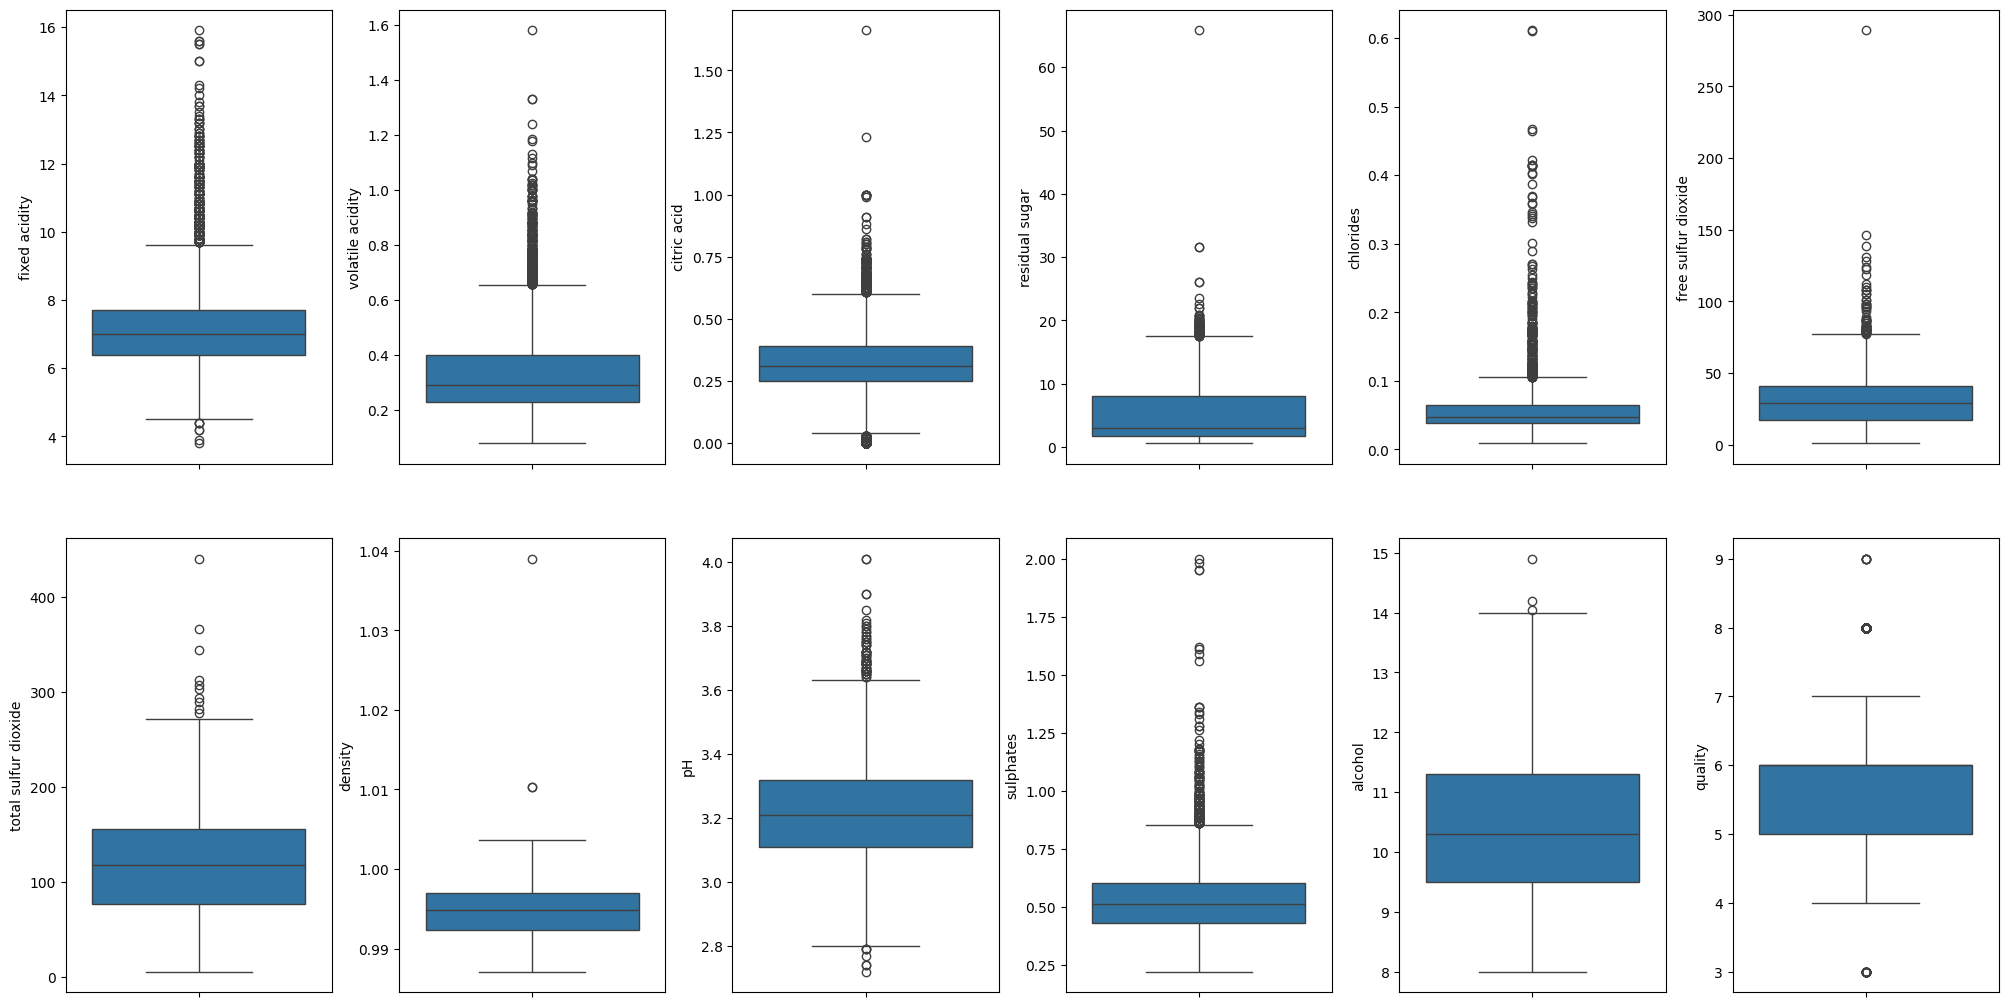

In [ ]:
# Creating box plots:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  if col != 'type':
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

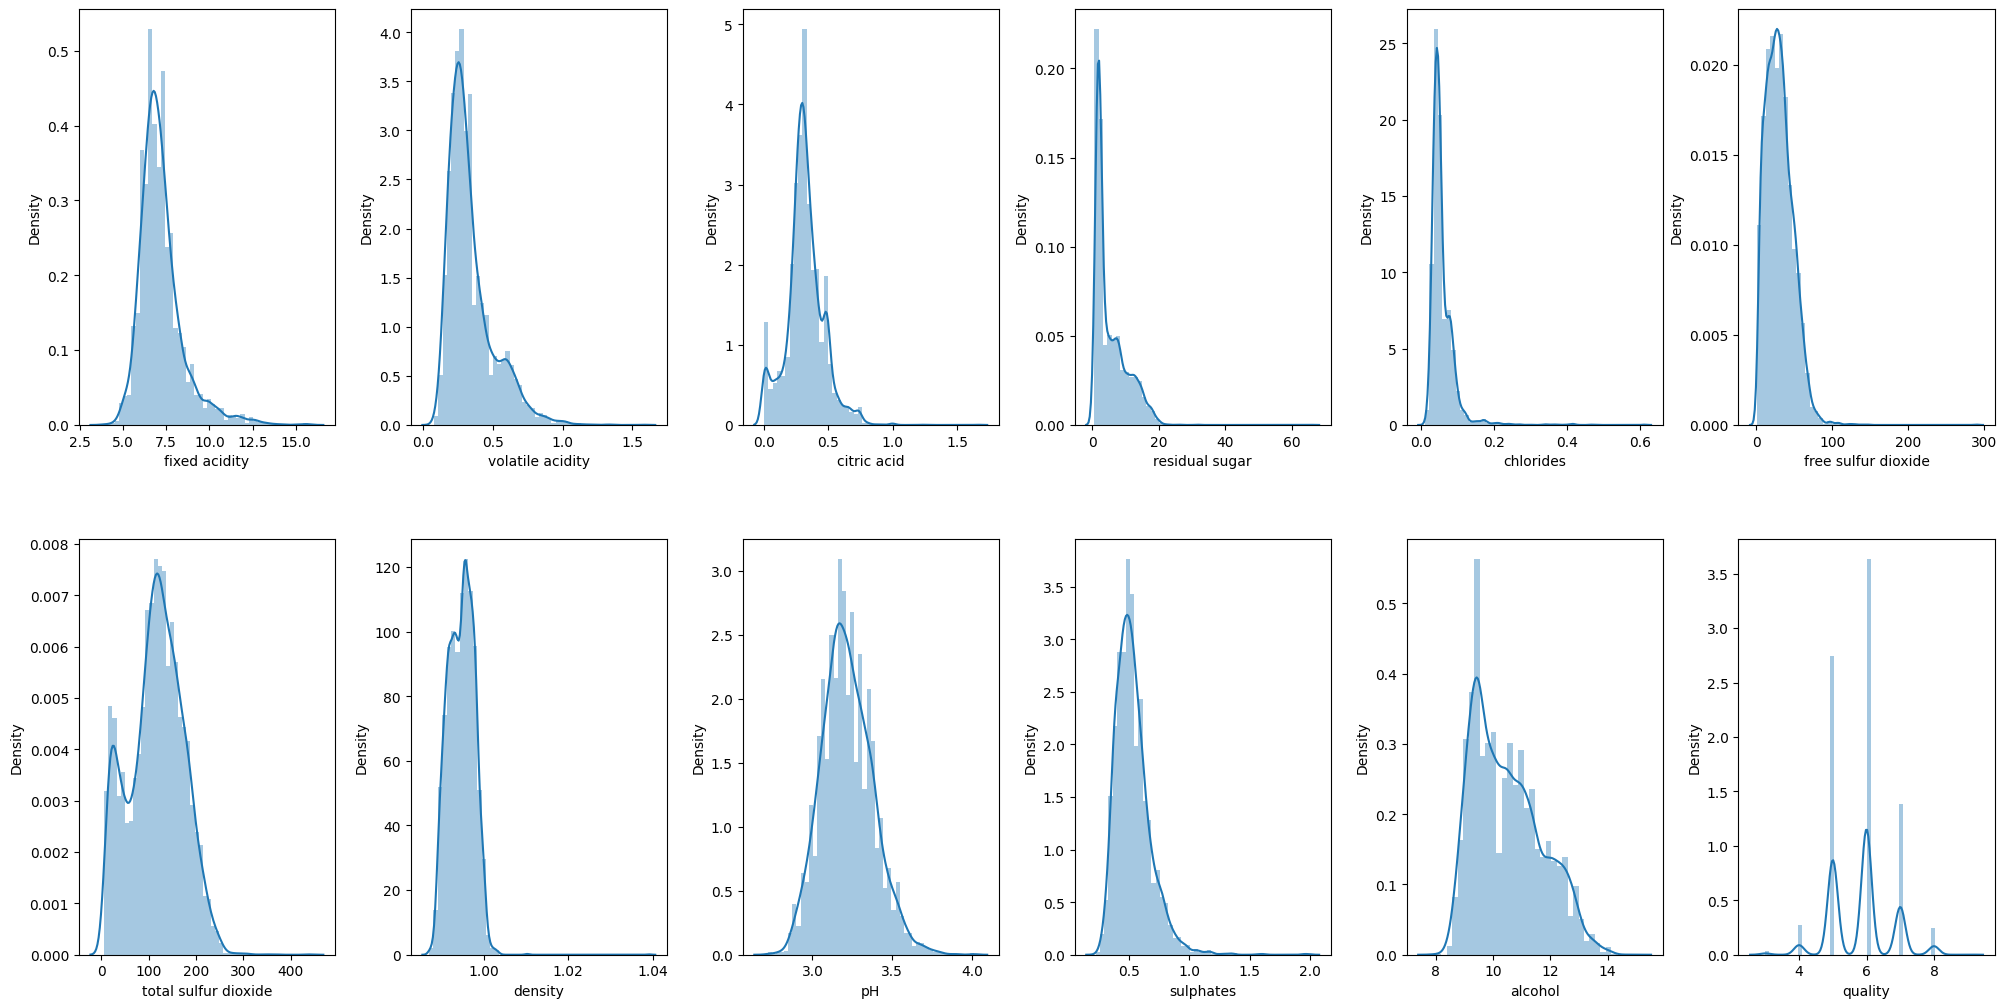

In [ ]:
# Create a distribution plot

fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  if col != 'type':
    sns.distplot(value, ax=ax[index])
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Log Transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])

<Axes: xlabel='free sulfur dioxide', ylabel='Density'>

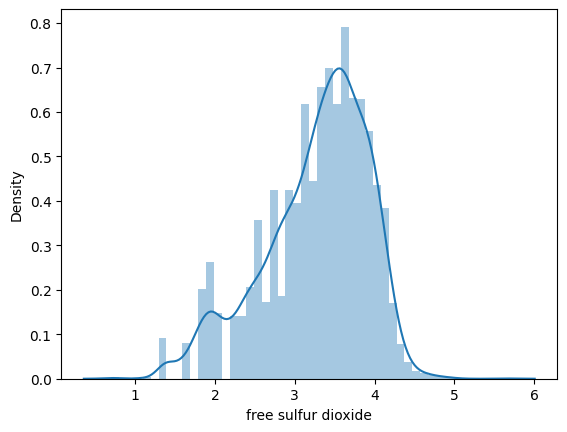

In [ ]:
sns.distplot(df['free sulfur dioxide'])

<Axes: xlabel='type', ylabel='count'>

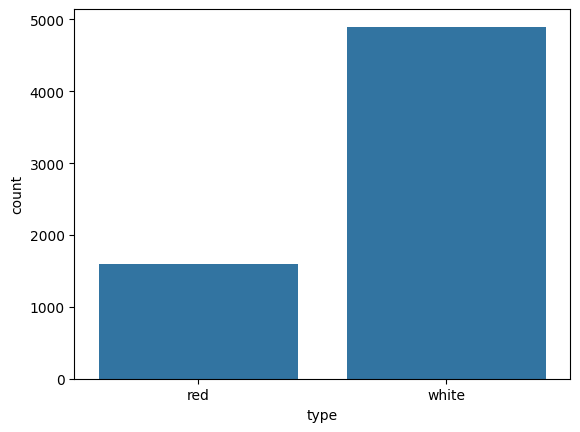

In [ ]:
# See how much data is for white and red
df['type'] = df['type'].astype('category')
sns.countplot(x='type', data=df)

<Axes: xlabel='quality', ylabel='count'>

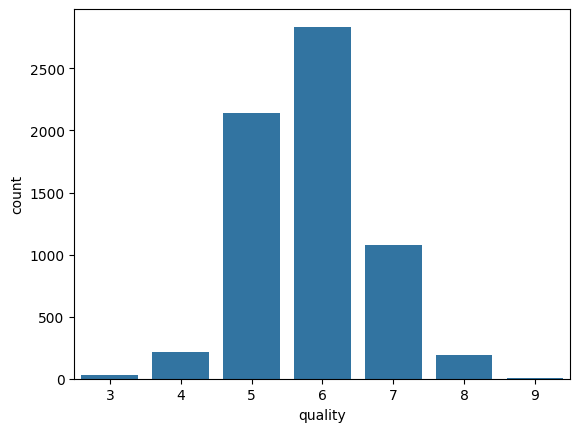

In [ ]:
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
sns.countplot(x='quality', data=df)

Based on the plot for quality, there exists a classs imbalancement and hence the model will be biased to output a quality of either 5,6 or 7 on the test data set. Hence, this needs to be generalized.

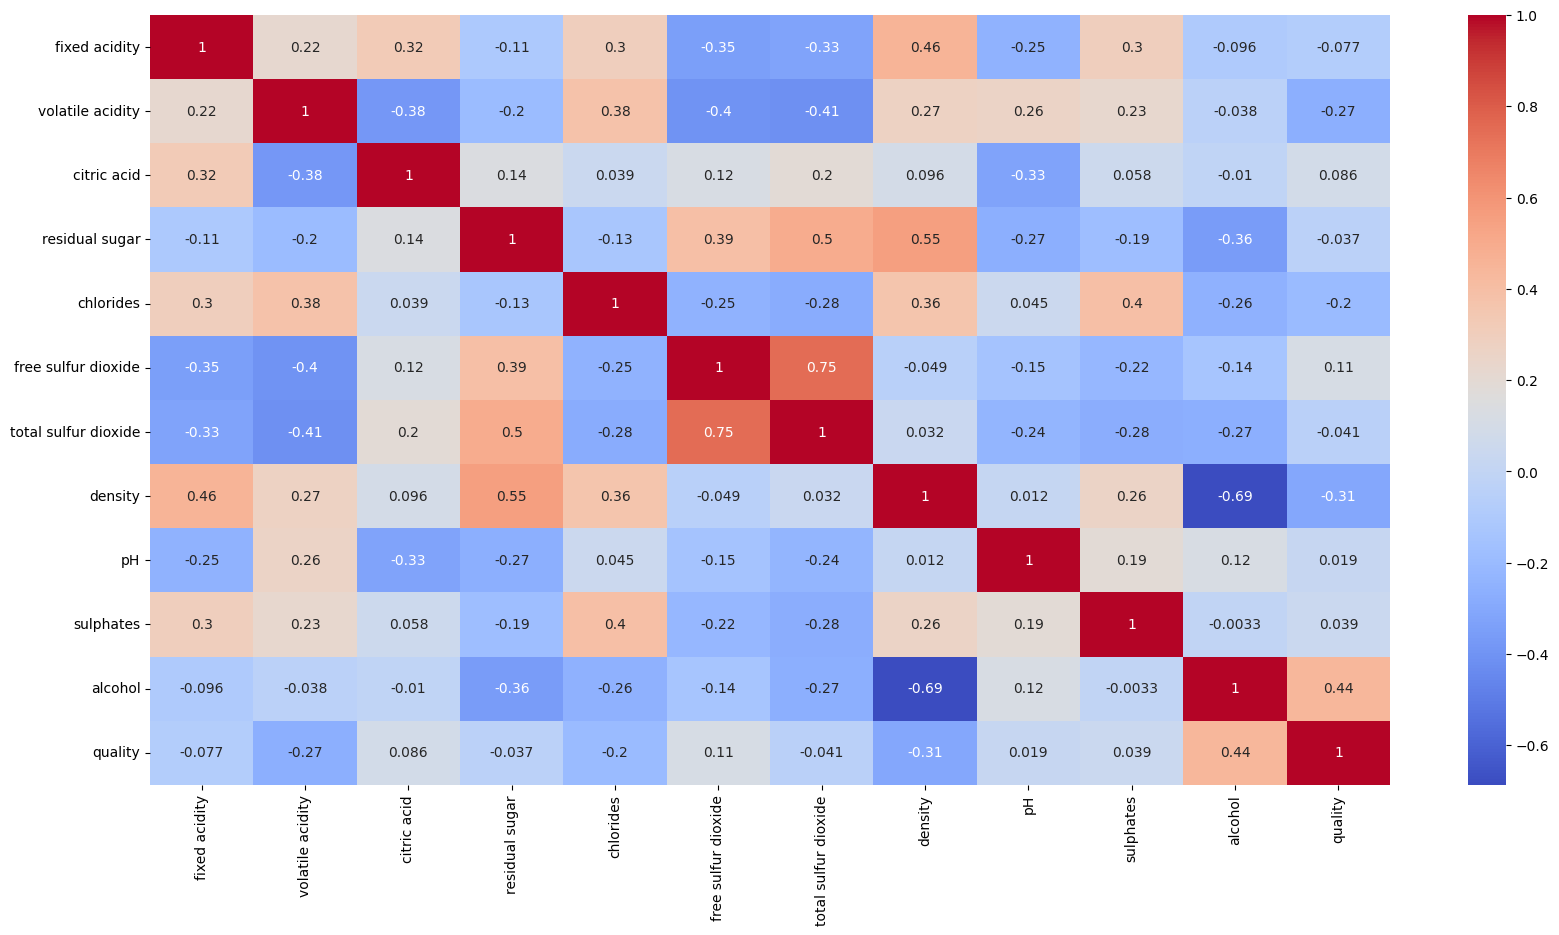

In [ ]:
# Drop non-numeric columns like 'type'
df_numeric = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = df_numeric.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Input Split

In [ ]:
X = df.drop(columns=['type', 'quality'])
y = df['quality']

In [ ]:
y.value_counts()

,count
quality,
6,2836
5,2138
7,1079
4,216
8,193
3,30
9,5


Now, importing SMOTE to generalize the imbalanced data. It helps to balance the class distribution of the original dataset by generating synthetic samples for the minority class.

# Class balancing using SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
oversample = SMOTE(k_neighbors=4)

# Transform the dataset
X, y = oversample.fit_resample(X, y)

In [ ]:
y.value_counts()

,count
quality,
6,2836
5,2836
7,2836
8,2836
4,2836
3,2836
9,2836


All the classes now oversampled using SMOTE by creating new values from the neighbours' values.

# Model Training

In [ ]:
# Classification function
from sklearn.model_selection import cross_val_score, train_test_split

def classify(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  # Train the model
  model.fit(X_train, y_train)
  print('Accuracy:', model.score(X_test, y_test) * 100)

  # Cross-validation
  score = cross_val_score(model, X, y, cv=5)
  print('Cross Validation Score:', np.mean(score) * 100)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Don't confuse, this is a classification model not a regression model
model = LogisticRegression()

classify(model, X, y)

Accuracy: 34.39451944388475
Cross Validation Score: 32.02675188567999


Let's import an advanced model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy: 80.83820269997986
Cross Validation Score: 75.28722279346421


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model, X, y)

Accuracy: 88.27322184162804
Cross Validation Score: 82.50561152740238


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model, X, y)

Accuracy: 89.17993149304856
Cross Validation Score: 83.40226973010245


In [ ]:
import xgboost as xgb

In [ ]:
# model = xgb.XGBClassifier()
# classify(model, X, y)

XGB expects values from 0 in an orderly fashion, and our data contains it as 3, 4, 5, ... 9. Hence, I need to remap the class labels to start from 0 by subtracting the min value from all the class labels

In [ ]:
# Re-map y to start from 0
y_remapped = y - y.min()

# Verify the new class labels
print(f"Original classes: {np.unique(y)}")
print(f"Remapped classes: {np.unique(y_remapped)}")

# Now fit the model with the remapped labels
model = xgb.XGBClassifier()
classify(model, X, y_remapped)

Original classes: [3 4 5 6 7 8 9]
Remapped classes: [0 1 2 3 4 5 6]
Accuracy: 87.70904694741084
Cross Validation Score: 81.31695599139098


Now, importing LightGBM. LightGBM is optimized for high performance with distributed systems. LightGBM creates decision trees that grow leaf wise, which means that given a condition, only a single leaf is split, depending on the gain.

In [ ]:
import lightgbm as lgb

In [ ]:
model = lgb.LGBMClassifier()
classify(model, X, y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003313 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 14889, number of used features: 11
[LightGBM] [Info] Start training from score -1.952987
[LightGBM] [Info] Start training from score -1.940752
[LightGBM] [Info] Start training from score -1.944970
[LightGBM] [Info] Start training from score -1.953935
[LightGBM] [Info] Start training from score -1.944501
[LightGBM] [Info] Start training from score -1.958685
[LightGBM] [Info] Start training from score -1.925896
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 86.76203908926053
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead

Now, fine-tuning the Hyperparameters...

In [ ]:
# Import necessary libraries
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# Split the data outside the function so it's accessible globally
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the model
model = ExtraTreesClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30]         # Maximum depth of each tree
}

# Set up grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)

# Perform the search
grid_search.fit(X_train, y_train)

# Output the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Retrain the model with the best hyperparameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Test the model on the test set
accuracy = best_model.score(X_test, y_test) * 100
print(f"Accuracy on Test Data: {accuracy:.2f}%")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'max_depth': 30, 'n_estimators': 300}
Accuracy on Test Data: 89.02%


# Evaluating the Model using
- Confusion Matrix: Calculates the TP, TN, FP, FN
- Classification Report: Metrics like precision, recall, and F1-score for each class
- Accuracy: Correctness of the model

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
y_pred = best_model.predict(X_test)

# Creating a Confusion Matrix

A confusion matrix is a table used to evaluate the performance of a classification algorithm. It helps you understand the types of errors your model is making by comparing the actual and predicted labels.

In [ ]:
confMat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confMat)

Confusion Matrix: 
 [[724   0   0   0   0   0   0]
 [  1 680  16   0   1   0   0]
 [  4  45 533 108  16   1   0]
 [  1  13 132 447 121  12   0]
 [  0   3   7  42 644  10   0]
 [  0   1   2   1   8 724   0]
 [  0   0   0   0   0   0 666]]


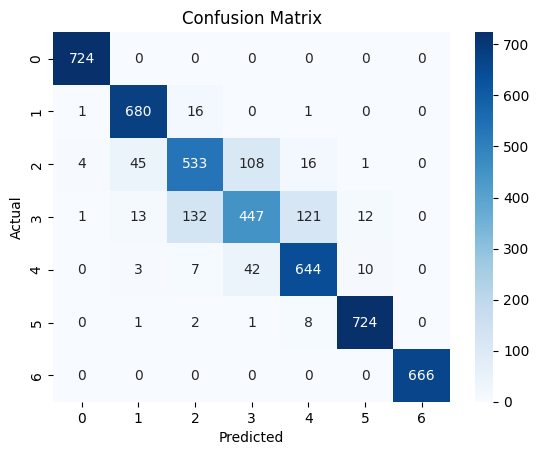

In [ ]:
sns.heatmap(confMat, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report

The classification report provides detailed metrics for each class in a multi-class classification problem (or for positive/negative classes in binary classification). These metrics include:

- **Precision**:
The ratio of correctly predicted positive observations to the total predicted positives.
Formula: Precision = TP / (TP + FP)
High precision means that more of the predicted positives are actually true positives.

- **Recall** (also known as Sensitivity or True Positive Rate):
The ratio of correctly predicted positive observations to all actual positives.
Formula: Recall = TP / (TP + FN)
High recall means the model correctly captures most of the actual positive cases.

- **F1-Score**:
The harmonic mean of precision and recall.
Formula: F1-Score = 2 * (Precision * Recall) / (Precision + Recall)
It balances precision and recall, making it useful when you want a single metric to measure both.

- **Support**:
The number of actual occurrences of each class in the dataset (i.e., the number of samples of each class in y_test).

In [ ]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           3       0.99      1.00      1.00       724
           4       0.92      0.97      0.94       698
           5       0.77      0.75      0.76       707
           6       0.75      0.62      0.68       726
           7       0.82      0.91      0.86       706
           8       0.97      0.98      0.98       736
           9       1.00      1.00      1.00       666

    accuracy                           0.89      4963
   macro avg       0.89      0.89      0.89      4963
weighted avg       0.89      0.89      0.89      4963



# Accuracy, Precision, Recall and F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy * 100)

precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision * 100)

recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall * 100)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1 * 100)

Accuracy: 89.01873866612937
Precision: 88.68425181293908
Recall: 89.01873866612937
F1 Score: 88.70450375852612


# ROC Curve for Multi-class Classification:
Using One-vs-Rest ROC Curve which treas each class as a binary problem (one class vs. other classes) and computes ROC and AUC for each class.

- ROC Curve: For each class, the curve shows the tradeoff between the true positive rate and false positive rate as you vary the threshold.
- AUC: The closer the AUC is to 1, the better the model is at distinguishing between that class and the rest. An AUC of 0.5 suggests the model is no better than random guessing.

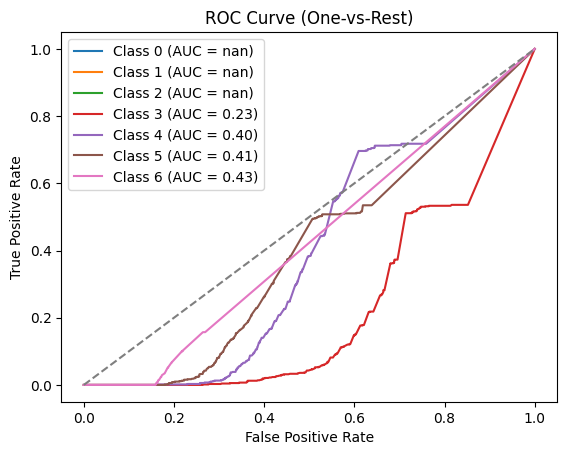

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6])
y_score = best_model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (One-vs-Rest)')
plt.legend()
plt.show()